<a href="https://colab.research.google.com/github/srivatsan88/End-to-End-Time-Series/blob/master/Multivariate_Time_Series_using_VAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker


import numpy as np
import datetime

from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.api import VAR


mpl.rcParams['figure.figsize'] = (16, 8)
mpl.rcParams['axes.grid'] = False

In [ ]:
stock_tickers = [
    'BID',
    'BVH',
    'CTG',
    'FPT',
    'GAS',
    'HDB',
    'HPG',
    'KDH',
    'MBB',
    'MSN',
    'MWG',
    'NVL',
    'PDR',
    'PLX',
    'PNJ',
    'POW',
    'REE',
    'SBT',
    'SSI',
    'STB',
    'TCB',
    'TCH',
    'TPB',
    'VCB',
    'VHM',
    'VIC',
    'VJC',
    'VNM',
    'VPB',
    'VRE',
    'VN30'
]
company_name_dict = {
    'BID': 'Ngân hàng TMCP Đầu tư và Phát triển Việt Nam',
    'BVH': 'Tập đoàn Bảo Việt',
    'CTG': 'Ngân hàng TMCP Công Thương Việt Nam',
    'FPT': 'CTCP FPT',
    'GAS': 'Tổng Công ty khí Việt Nam - CTCP',
    'HDB': 'Ngân hàng TMCP Phát triển Thành phố Hồ Chí Minh',
    'HPG': 'CTCP Tập đoàn Hòa Phát',
    'KDH': 'CTCP Đầu tư và Kinh doanh Nhà Khang Điền',
    'MBB': 'Ngân hàng TMCP Quân Đội',
    'MSN': 'CTCP Tập đoàn MaSan',
    'MWG': 'CTCP Đầu tư Thế giới Di động',
    'NVL': 'CTCP Tập đoàn Đầu tư Địa ốc No Va',
    'PDR': 'CTCP Phát triển Bất động sản Phát Đạt',
    'PLX': 'Tập đoàn Xăng dầu Việt Nam',
    'PNJ': 'CTCP Vàng bạc Đá quý Phú Nhuận',
    'POW': 'Tổng Công ty Điện lực Dầu khí Việt Nam - CTCP',
    'REE': 'CTCP Cơ điện lạnh',
    'SBT': 'CTCP Thành Thành Công - Biên Hòa',
    'SSI': 'CTCP Chứng khoán SSI',
    'STB': 'Ngân hàng TMCP Sài Gòn Thương Tín',
    'TCB': 'Ngân hàng TMCP Kỹ thương Việt Nam',
    'TCH': 'CTCP Đầu tư Dịch vụ Tài chính Hoàng Huy',
    'TPB': 'Ngân Hàng TMCP Tiên Phong',
    'VCB': 'Ngân hàng TMCP Ngoại thương Việt Nam',
    'VHM': 'CTCP Vinhomes',
    'VIC': 'Tập đoàn Vingroup - CTCP',
    'VJC': 'CTCP Hàng không VIETJET',
    'VNM': 'CTCP Sữa Việt Nam',
    'VPB': 'Ngân hàng TMCP Việt Nam Thịnh Vượng',
    'VRE': 'CTCP Vincom Retail',
    'VN30': 'Chi so VN 30'
}


In [ ]:
df_list = {}

for ticker in stock_tickers:
    df_list[ticker] = pd.read_csv(f'dataset/{ticker} Historical Data.csv', index_col=0, parse_dates=True)

In [ ]:
for ticker, stock_df in df_list.items():
    print('ticker: {} -> {}'.format(ticker, stock_df.index.min()))

ticker: BID -> 2014-01-27 00:00:00
ticker: BVH -> 2010-01-04 00:00:00
ticker: CTG -> 2010-01-04 00:00:00
ticker: FPT -> 2010-01-04 00:00:00
ticker: GAS -> 2013-07-01 00:00:00
ticker: HDB -> 2018-01-08 00:00:00
ticker: HPG -> 2010-01-04 00:00:00
ticker: KDH -> 2010-02-02 00:00:00
ticker: MBB -> 2011-11-02 00:00:00
ticker: MSN -> 2013-07-29 00:00:00
ticker: MWG -> 2014-07-15 00:00:00
ticker: NVL -> 2016-12-29 00:00:00
ticker: PDR -> 2013-07-18 00:00:00
ticker: PLX -> 2017-04-24 00:00:00
ticker: PNJ -> 2010-01-04 00:00:00
ticker: POW -> 2018-03-07 00:00:00
ticker: REE -> 2010-01-04 00:00:00
ticker: SBT -> 2010-01-04 00:00:00
ticker: SSI -> 2010-01-04 00:00:00
ticker: STB -> 2013-07-30 00:00:00
ticker: TCB -> 2018-06-05 00:00:00
ticker: TCH -> 2016-10-06 00:00:00
ticker: TPB -> 2018-04-20 00:00:00
ticker: VCB -> 2010-01-04 00:00:00
ticker: VHM -> 2018-05-18 00:00:00
ticker: VIC -> 2013-07-08 00:00:00
ticker: VJC -> 2017-03-01 00:00:00
ticker: VNM -> 2013-07-10 00:00:00
ticker: VPB -> 2017-

In [ ]:

key_list = [k for k in df_list.keys()]
for key in key_list:
    current_df = df_list[key]
    print(f'Ticker {key}: {current_df.index.min()}')
    if current_df.index.min().year >= 2017:
        del df_list[key]
        print(f'Deleted Ticker {key}')

Ticker BID: 2014-01-27 00:00:00
Ticker BVH: 2010-01-04 00:00:00
Ticker CTG: 2010-01-04 00:00:00
Ticker FPT: 2010-01-04 00:00:00
Ticker GAS: 2013-07-01 00:00:00
Ticker HDB: 2018-01-08 00:00:00
Deleted Ticker HDB
Ticker HPG: 2010-01-04 00:00:00
Ticker KDH: 2010-02-02 00:00:00
Ticker MBB: 2011-11-02 00:00:00
Ticker MSN: 2013-07-29 00:00:00
Ticker MWG: 2014-07-15 00:00:00
Ticker NVL: 2016-12-29 00:00:00
Ticker PDR: 2013-07-18 00:00:00
Ticker PLX: 2017-04-24 00:00:00
Deleted Ticker PLX
Ticker PNJ: 2010-01-04 00:00:00
Ticker POW: 2018-03-07 00:00:00
Deleted Ticker POW
Ticker REE: 2010-01-04 00:00:00
Ticker SBT: 2010-01-04 00:00:00
Ticker SSI: 2010-01-04 00:00:00
Ticker STB: 2013-07-30 00:00:00
Ticker TCB: 2018-06-05 00:00:00
Deleted Ticker TCB
Ticker TCH: 2016-10-06 00:00:00
Ticker TPB: 2018-04-20 00:00:00
Deleted Ticker TPB
Ticker VCB: 2010-01-04 00:00:00
Ticker VHM: 2018-05-18 00:00:00
Deleted Ticker VHM
Ticker VIC: 2013-07-08 00:00:00
Ticker VJC: 2017-03-01 00:00:00
Deleted Ticker VJC
Tic

In [ ]:
min_date = max(list([stock_df.index.min() for stock_df in df_list.values()]))
max_date = min(list([stock_df.index.max() for stock_df in df_list.values()]))

In [ ]:
print(min_date)
print(max_date)

2016-12-29 00:00:00
2022-12-30 00:00:00


In [ ]:
index = pd.date_range(start=min_date, end=max_date, freq='D')
stock_price_df = pd.DataFrame(index=index)
for key, ticker_df in df_list.items():
    stock_price_df = pd.concat([stock_price_df, ticker_df[['Price']]], axis=1)
    stock_price_df.rename(columns={'Price': key}, inplace=True)

# stock_price_df = stock_price_df[stock_price_df.index > min_date]

In [ ]:
stock_price_df

,BID,BVH,CTG,FPT,GAS,HPG,KDH,MBB,MSN,MWG,...,PNJ,REE,SBT,SSI,STB,TCH,VCB,VIC,VNM,VN30
2010-01-04,NaN,"29,886.0","16,913.0","8,189.5",NaN,"1,976.2",NaN,NaN,NaN,NaN,...,"5,898.5","18,458.0","3,659.7","12,429.1",NaN,NaN,"13,465",NaN,NaN,550.43
2010-01-05,NaN,"30,074.0","17,241.0","8,189.5",NaN,"2,073.4",NaN,NaN,NaN,NaN,...,"6,188.6","19,209.0","3,784.9","12,990.9",NaN,NaN,"13,602",NaN,NaN,566.65
2010-01-06,NaN,"29,980.0","16,475.0","8,040.6",NaN,"2,138.2",NaN,NaN,NaN,NaN,...,"6,237.0","18,972.0","3,847.4","13,342.0",NaN,NaN,"13,110",NaN,NaN,565.41
2010-01-07,NaN,"29,510.0","16,201.0","7,991.0",NaN,"2,203.0",NaN,NaN,NaN,NaN,...,"6,091.9","18,854.0","4,035.1","12,990.9",NaN,NaN,"12,837",NaN,NaN,560.61
2010-01-08,NaN,"29,604.0","16,037.0","7,742.8",NaN,"2,105.8",NaN,NaN,NaN,NaN,...,"5,801.8","18,379.0","4,222.8","12,780.2",NaN,NaN,"12,837",NaN,NaN,547.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,"38,800.0","45,500.0","26,050.0","76,400.0","102,600.0","17,100.0","24,650.0","16,800.0","91,500","42,600",...,"81,000.0","70,300.0","13,750.0","17,050.0","21,900.0","6,480.0","78,900","52,900","76,000.0",987.77
2022-12-27,"40,000.0","46,500.0","26,600.0","76,500.0","103,100.0","18,250.0","26,350.0","17,250.0","91,600","43,800",...,"81,000.0","72,000.0","13,850.0","18,200.0","22,500.0","6,900.0","79,100","53,400","76,600.0","1,007.36"
2022-12-28,"41,900.0","46,700.0","27,150.0","76,700.0","103,000.0","18,200.0","27,050.0","17,450.0","93,000","43,000",...,"82,500.0","71,800.0","14,300.0","18,150.0","22,900.0","6,900.0","80,000","53,500","77,000.0","1,013.95"
2022-12-29,"40,000.0","46,500.0","27,000.0","76,200.0","102,600.0","18,000.0","27,950.0","17,400.0","94,000","42,900",...,"86,000.0","71,800.0","14,500.0","17,600.0","22,350.0","6,860.0","80,700","53,600","77,000.0","1,008.30"


In [ ]:
stock_price_df = stock_price_df.replace(',','', regex=True)

stock_price_df = stock_price_df.replace('%','', regex=True)


In [ ]:
for col in stock_price_df.columns:
    stock_price_df[col] = stock_price_df[col].astype(np.float32)

In [ ]:
# stock_price_df = stock_price_df.interpolate(method='linear', axis=0).ffill().bfill()


In [ ]:
stock_price_df.count()

BID     2228
BVH     3243
CTG     3243
FPT     3243
GAS     2376
HPG     3243
KDH     3220
MBB     2788
MSN     2356
MWG     2118
NVL     1501
PDR     2297
PNJ     3233
REE     3243
SBT     3243
SSI     3243
STB     2355
TCH     1561
VCB     3243
VIC     2371
VNM     2369
VN30    3244
dtype: int64

In [ ]:
stock_price_df.isna().sum()

BID     1707
BVH      692
CTG      692
FPT      692
GAS     1559
HPG      692
KDH      715
MBB     1147
MSN     1579
MWG     1817
NVL     2434
PDR     1638
PNJ      702
REE      692
SBT      692
SSI      692
STB     1580
TCH     2374
VCB      692
VIC     1564
VNM     1566
VN30     691
dtype: int64

In [ ]:
stock_price_df

,BID,BVH,CTG,FPT,GAS,HPG,KDH,MBB,MSN,MWG,...,PNJ,REE,SBT,SSI,STB,TCH,VCB,VIC,VNM,VN30
2010-01-04,NaN,29886.0,16913.0,8189.500000,NaN,1976.199951,NaN,NaN,NaN,NaN,...,5898.500000,18458.0,3659.699951,12429.099609,NaN,NaN,13465.0,NaN,NaN,550.429993
2010-01-05,NaN,30074.0,17241.0,8189.500000,NaN,2073.399902,NaN,NaN,NaN,NaN,...,6188.600098,19209.0,3784.899902,12990.900391,NaN,NaN,13602.0,NaN,NaN,566.650024
2010-01-06,NaN,29980.0,16475.0,8040.600098,NaN,2138.199951,NaN,NaN,NaN,NaN,...,6237.000000,18972.0,3847.399902,13342.000000,NaN,NaN,13110.0,NaN,NaN,565.409973
2010-01-07,NaN,29510.0,16201.0,7991.000000,NaN,2203.000000,NaN,NaN,NaN,NaN,...,6091.899902,18854.0,4035.100098,12990.900391,NaN,NaN,12837.0,NaN,NaN,560.609985
2010-01-08,NaN,29604.0,16037.0,7742.799805,NaN,2105.800049,NaN,NaN,NaN,NaN,...,5801.799805,18379.0,4222.799805,12780.200195,NaN,NaN,12837.0,NaN,NaN,547.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,38800.0,45500.0,26050.0,76400.000000,102600.0,17100.000000,24650.0,16800.0,91500.0,42600.0,...,81000.000000,70300.0,13750.000000,17050.000000,21900.0,6480.0,78900.0,52900.0,76000.0,987.770020
2022-12-27,40000.0,46500.0,26600.0,76500.000000,103100.0,18250.000000,26350.0,17250.0,91600.0,43800.0,...,81000.000000,72000.0,13850.000000,18200.000000,22500.0,6900.0,79100.0,53400.0,76600.0,1007.359985
2022-12-28,41900.0,46700.0,27150.0,76700.000000,103000.0,18200.000000,27050.0,17450.0,93000.0,43000.0,...,82500.000000,71800.0,14300.000000,18150.000000,22900.0,6900.0,80000.0,53500.0,77000.0,1013.950012
2022-12-29,40000.0,46500.0,27000.0,76200.000000,102600.0,18000.000000,27950.0,17400.0,94000.0,42900.0,...,86000.000000,71800.0,14500.000000,17600.000000,22350.0,6860.0,80700.0,53600.0,77000.0,1008.299988


In [ ]:
# stock_price_df.index = pd.DatetimeIndex(stock_price_df.index).to_period(freq='D')

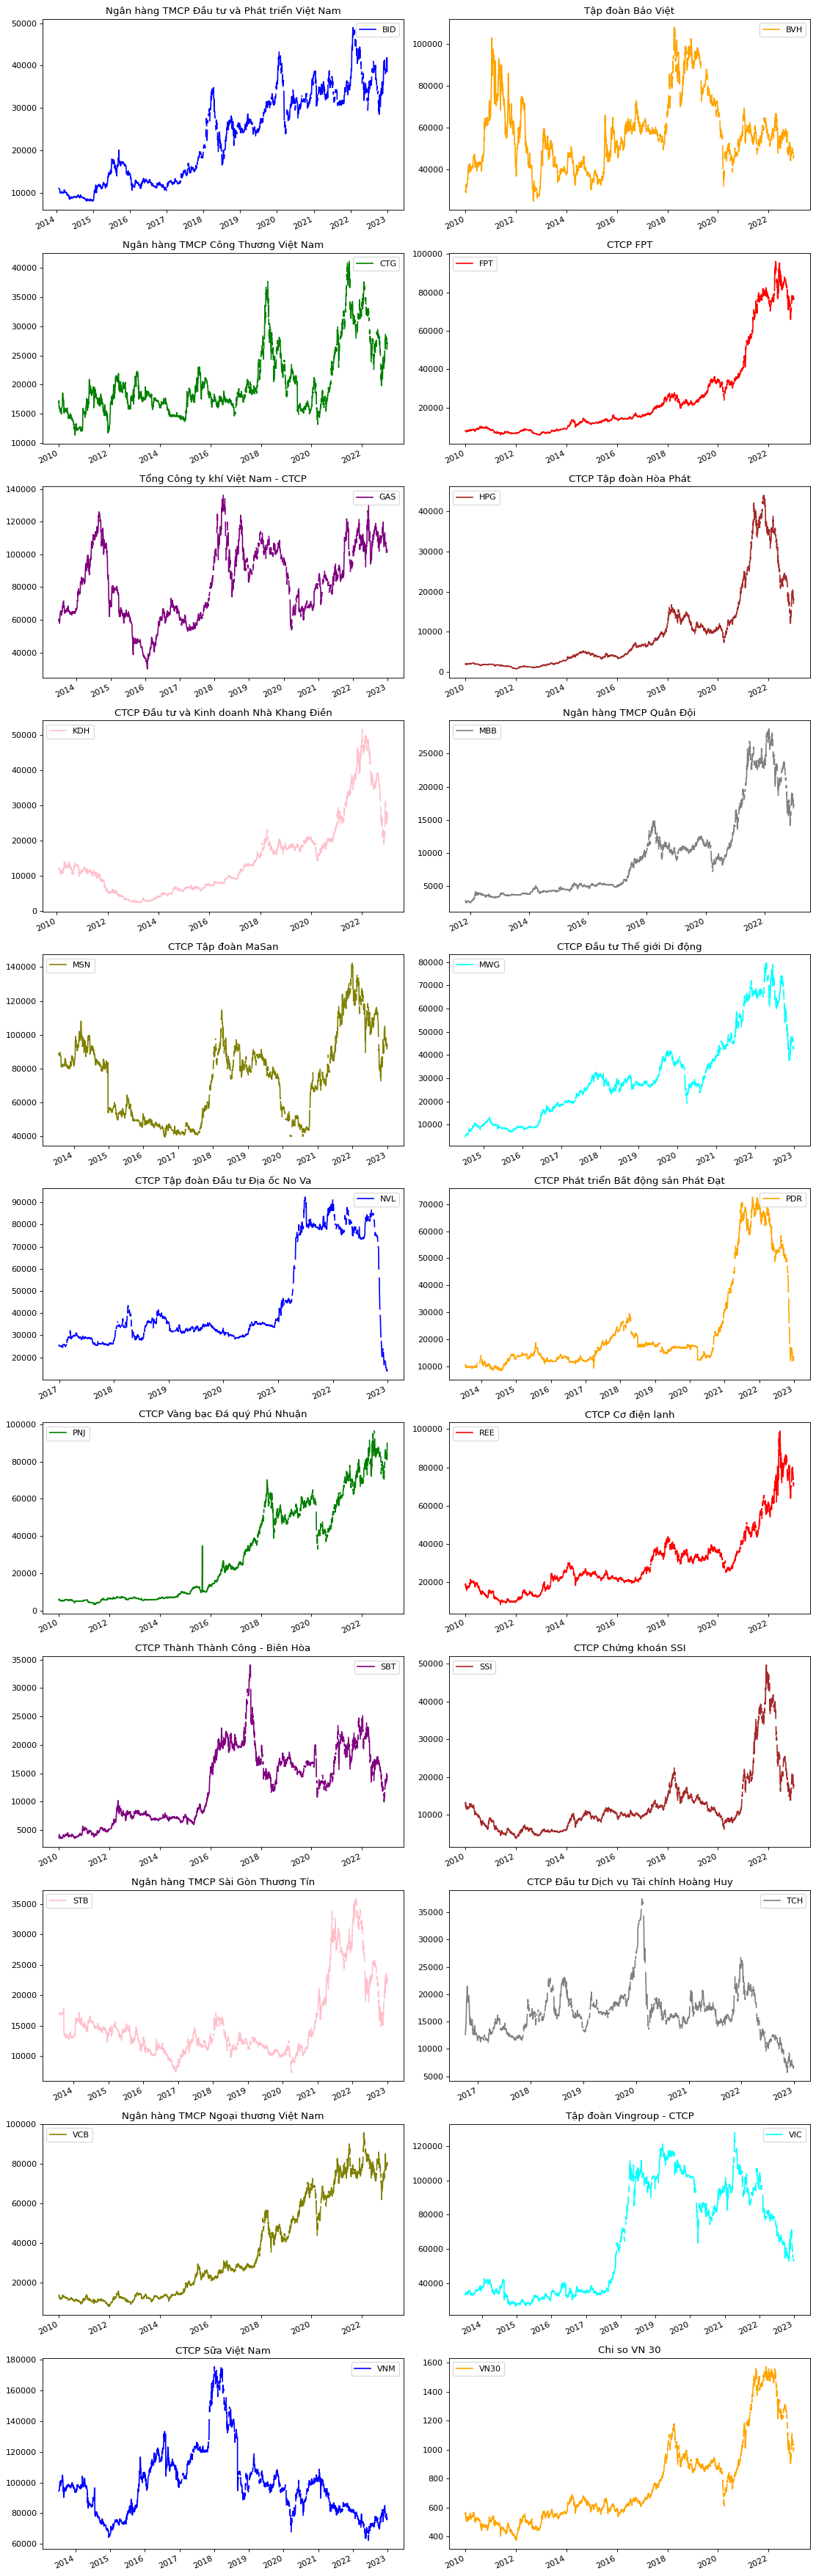

In [ ]:
color_list = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]


def Visualize(data):
    features= list(stock_price_df.select_dtypes(include=[np.number]).columns.values)
    feature_size=len(features)
    fig, axes = plt.subplots(
        nrows=int(np.ceil(feature_size/2)), ncols=2, figsize=(14, feature_size*2), dpi=80, facecolor="w", edgecolor="k"
    )
    # print('feature size ', feature_size)
    for i in range(feature_size):
        key = features[i]
        c = color_list[i % (len(color_list))]
        t_data = data[key]
        t_data.head()
        # print(i//2, i%2)
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{}".format(company_name_dict[key]),
            rot=25,
        )
        ax.legend([key])
    plt.tight_layout()


Visualize(stock_price_df)

In [ ]:
stock_price_df.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2022-12-21', '2022-12-22', '2022-12-23', '2022-12-24',
               '2022-12-25', '2022-12-26', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', length=3935, freq=None)

<Axes: >

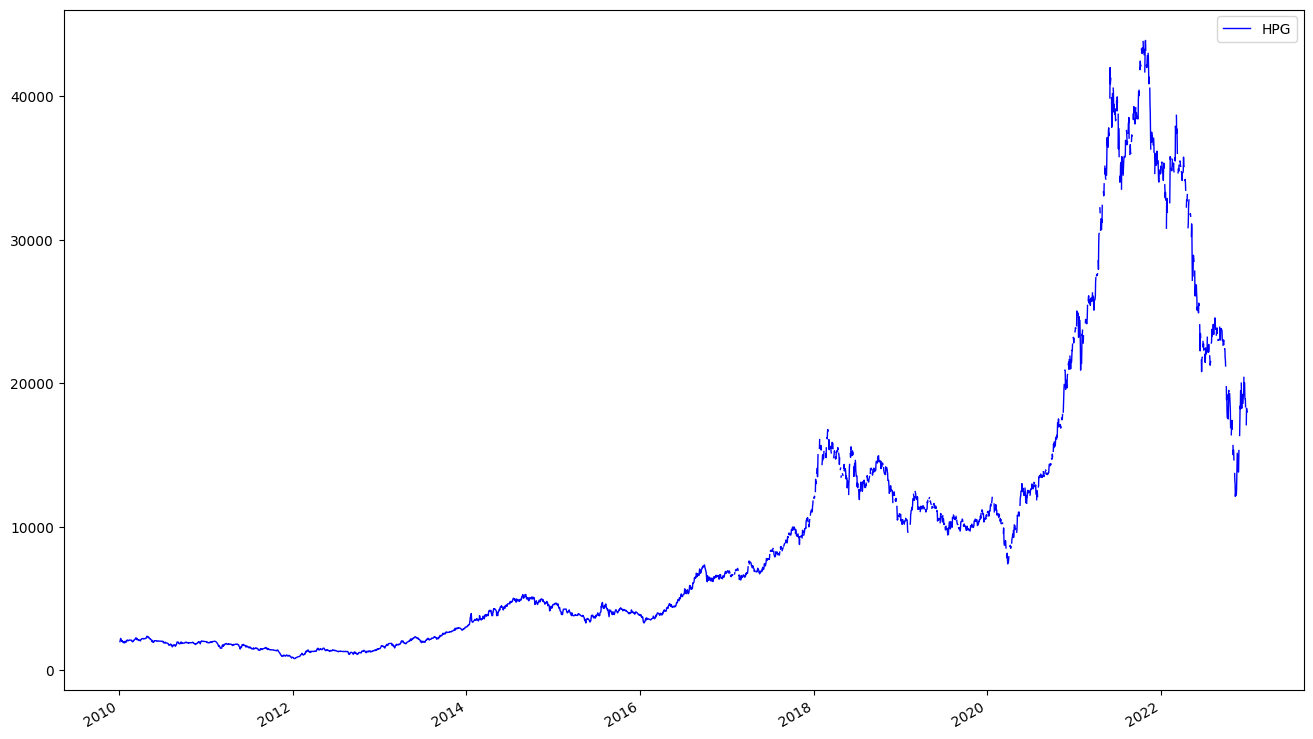

In [ ]:
stock_price_df[['HPG']].plot(color='blue', figsize=(16, 10), linewidth=1)


In [ ]:
raw_stock_price_df = stock_price_df
stock_price_df = stock_price_df.copy()


<Axes: >

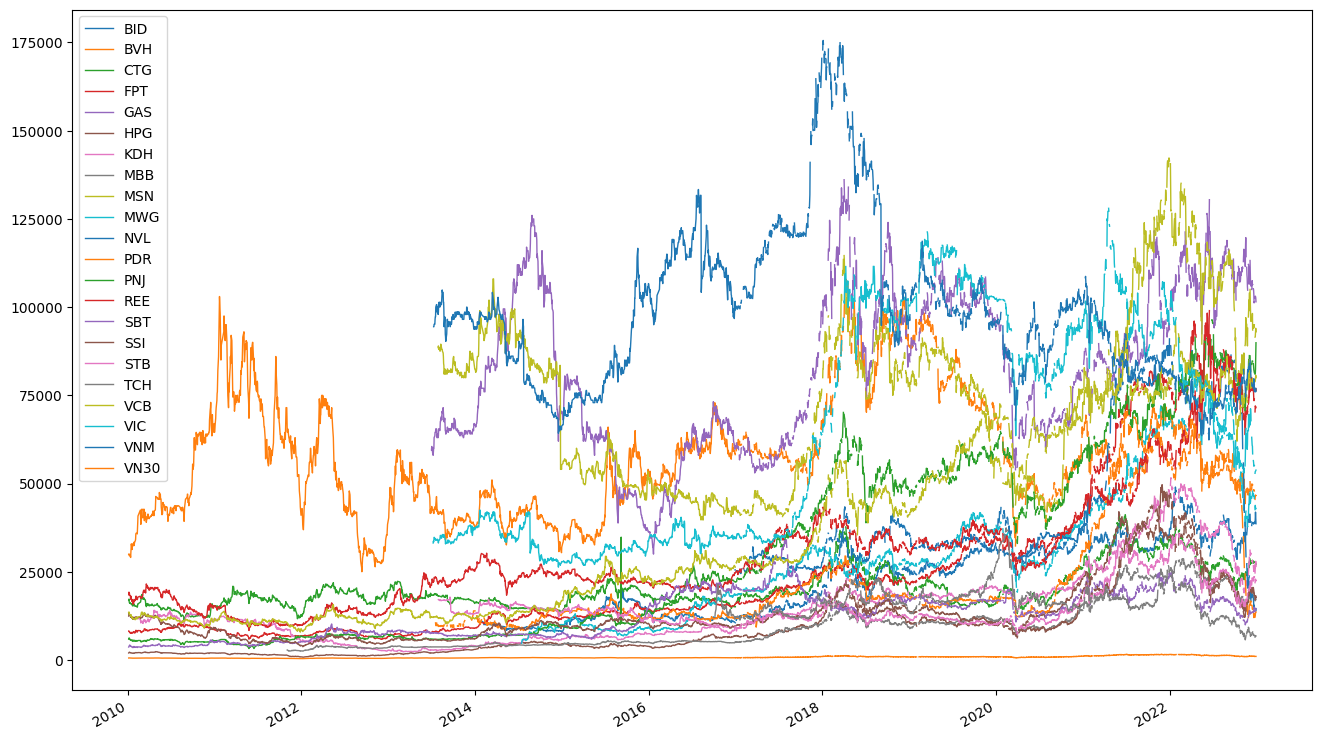

In [ ]:
stock_price_df.plot(figsize=(16, 10), linewidth=1)

Giả thuyết rỗng - Chuỗi không có tính dừng

Đối thuyết - Chuỗi có tính dừng

In [ ]:
def check_stationary(stock_price_df):
  for i in range(len(stock_price_df.columns)):
    print(f'============Testing stationary for {stock_price_df.columns[i]} series ==========')
    stock_df = stock_price_df[stock_price_df.columns[i]].dropna()
    result = adfuller(stock_df, autolag="AIC")
    print('ADF Statistic: %d' % result[0])
    print('p-value: %f' % result[1])
    print('number of lag %f' % result[2])
    print('Critical Values:')
    for key, value in result[4].items():
      print('\t%s: %.3f' % (key, value))
    
    print(result[1])
    if result[1] > 0.05 :
      print('===> {} - Series is not Stationary'.format(stock_price_df.columns[i]))
    else:
      print('{} - Series is Stationary'.format(stock_price_df.columns[i]))

In [ ]:
stock_price_df = stock_price_df[['BVH', 'CTG', 'FPT', 'GAS', 'KDH', 'MBB', 'MSN', 'MWG', 'REE', 'VIC', 'VN30']]

In [ ]:
stock_price_df = stock_price_df[stock_price_df.index > min_date].copy()
stock_price_df.dropna(inplace=True)

In [ ]:
check_stationary(stock_price_df)

============Testing stationary for BVH series ==========
ADF Statistic: -1
p-value: 0.569997
number of lag 10.000000
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568
0.5699965523660768
===> BVH - Series is not Stationary
============Testing stationary for CTG series ==========
ADF Statistic: -1
p-value: 0.291178
number of lag 1.000000
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568
0.29117801359815265
===> CTG - Series is not Stationary
============Testing stationary for FPT series ==========
ADF Statistic: 0
p-value: 0.945380
number of lag 23.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
0.9453804851439408
===> FPT - Series is not Stationary
============Testing stationary for GAS series ==========
ADF Statistic: -2
p-value: 0.128409
number of lag 2.000000
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568
0.1284089677264743
===> GAS - Series is not Stationary
============Testing stationary for KDH series ==========
ADF Statistic: -1
p-value: 0.488506
numbe

In [ ]:
origin_df = stock_price_df.copy()

In [ ]:
for i in range(len(stock_price_df.columns)):
    result = adfuller(stock_price_df[stock_price_df.columns[i]])
    if result[1] > 0.05 :
        stock_price_df[stock_price_df.columns[i]] = stock_price_df[stock_price_df.columns[i]] - stock_price_df[stock_price_df.columns[i]].shift(1)
            # copy_df.fillna(method='ffill', inplace=True)
stock_price_df.dropna(inplace=True)

Kiem dinh tinh dung

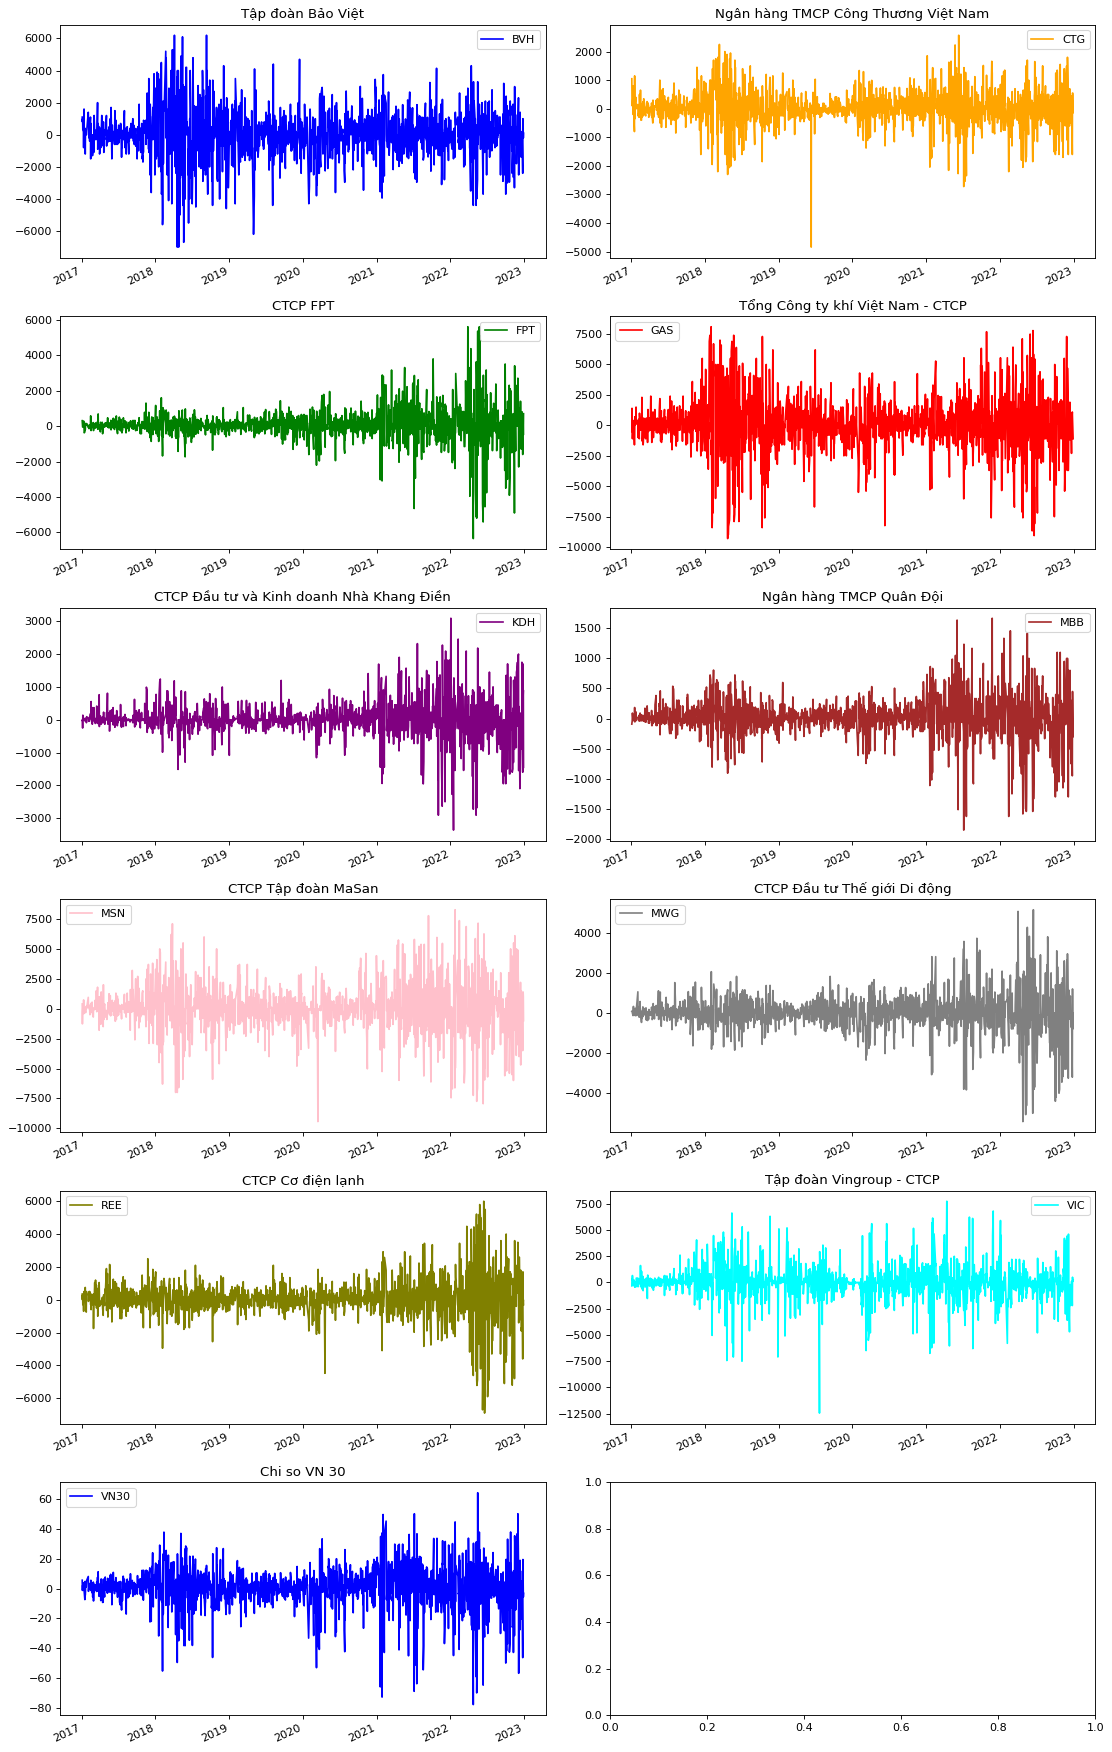

In [ ]:
Visualize(stock_price_df)

In [ ]:
stock_price_df.columns

Index(['BVH', 'CTG', 'FPT', 'GAS', 'KDH', 'MBB', 'MSN', 'MWG', 'REE', 'VIC',
       'VN30'],
      dtype='object')

Kiểm định nhân quả Granger
với 
<br>

 Giải thuyết rỗng H0: Xt không có quan hệ nhân quả Yt
 
 Đối thuyết H1: Xt tác động nhân quả granger lên Yt

In [ ]:
maxlag=10
test = 'ssr_chi2test'
def grangers_causality_matrix(X_train, variables, test = 'ssr_chi2test', verbose=False):
    dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in dataset.columns:
        for r in dataset.index:
            test_result = grangercausalitytests(X_train[[r,c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: 
                print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            # dataset.loc[r,c] = str(p_values)
            dataset.loc[r,c] = min_p_value
    dataset.columns = [var + '_x' for var in variables]
    dataset.index = [var + '_y' for var in variables]
    return dataset
causality_df = grangers_causality_matrix(stock_price_df, variables = stock_price_df.columns, test=test)
causality_df.to_csv('grangers_causality.csv')
causality_df

/home/noing/git/predict_tgdd/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 1
  warnings.warn('covariance of constraints does not have full '


,BVH_x,CTG_x,FPT_x,GAS_x,KDH_x,MBB_x,MSN_x,MWG_x,REE_x,VIC_x,VN30_x
BVH_y,1.0000,0.0079,0.2386,0.0003,0.7556,0.0133,0.0160,0.0424,0.4123,0.0169,0.0096
CTG_y,0.0052,1.0000,0.0198,0.0155,0.0229,0.0449,0.1303,0.0002,0.0003,0.1131,0.4473
FPT_y,0.0171,0.0000,1.0000,0.0328,0.0084,0.0000,0.0839,0.1669,0.1371,0.0999,0.0000
GAS_y,0.0001,0.0003,0.3695,1.0000,0.0372,0.0064,0.0303,0.0507,0.0269,0.0275,0.0043
KDH_y,0.0104,0.0262,0.0002,0.0009,1.0000,0.0014,0.0436,0.0416,0.0158,0.1890,0.0000
MBB_y,0.1757,0.0012,0.0038,0.0001,0.1365,1.0000,0.1940,0.0012,0.0000,0.0197,0.0158
MSN_y,0.0041,0.0048,0.0005,0.0039,0.7554,0.0004,1.0000,0.0000,0.0029,0.6478,0.0000
MWG_y,0.5939,0.0065,0.0211,0.2367,0.0046,0.0709,0.0456,1.0000,0.0004,0.0359,0.0039
REE_y,0.1063,0.0224,0.0145,0.1167,0.0134,0.0042,0.4709,0.0173,1.0000,0.0672,0.0167
VIC_y,0.0154,0.4493,0.6329,0.0028,0.0345,0.4856,0.3151,0.0439,0.2640,1.0000,0.2342


In [ ]:
stock_price_df

,BVH,CTG,FPT,GAS,KDH,MBB,MSN,MWG,REE,VIC,VN30
2017-01-03,1100.0,1050.0,306.200195,-500.0,-23.099609,-92.000000,400.0,83.0,350.0,-331.0,5.679993
2017-01-04,800.0,300.0,144.099609,1400.0,0.000000,-55.200195,-1267.0,70.0,0.0,372.0,-1.190002
2017-01-05,1000.0,100.0,-54.000000,0.0,-253.600586,-36.799805,-266.0,59.0,300.0,207.0,2.130005
2017-01-06,300.0,150.0,-54.000000,-1100.0,138.400391,92.000000,66.0,0.0,-300.0,661.0,1.510010
2017-01-09,200.0,450.0,90.000000,100.0,0.000000,-18.399902,-400.0,-129.0,-100.0,82.0,2.059998
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,-2400.0,-1600.0,-1600.000000,1100.0,-1600.000000,-950.000000,-3500.0,-3200.0,-3600.0,-2200.0,-46.359985
2022-12-27,1000.0,550.0,100.000000,500.0,1700.000000,450.000000,100.0,1200.0,1700.0,500.0,19.589966
2022-12-28,200.0,550.0,200.000000,-100.0,700.000000,200.000000,1400.0,-800.0,-200.0,100.0,6.590027
2022-12-29,-200.0,-150.0,-500.000000,-400.0,900.000000,-50.000000,1000.0,-100.0,0.0,100.0,-5.650024


In [ ]:
# df_train = stock_price_df[:int(0.9*(len(stock_price_df)))]
# df_test = stock_price_df[int(0.9*(len(stock_price_df))):]
origin_df = origin_df[stock_price_df.columns]
# df_train, df_test = origin_df[0:-nobs], origin_df[-nobs:]
nobs = 6
df_train = origin_df[:-nobs]
df_test = origin_df[-nobs:]

nobs = len(df_test)

# Check size
print(df_train.shape) 
print(df_test.shape)

(1494, 11)
(6, 11)


In [ ]:
# df_train.shape

In [ ]:
# df_test.shape

![link text](https://wikimedia.org/api/rest_v1/media/math/render/svg/d79bead4e9192d7fe2470a7936e4623e9ff252e1)

![link text](https://wikimedia.org/api/rest_v1/media/math/render/svg/d88ac4002c0641b2e93fb6d35f961ea63352b6a9)

In [ ]:
model = VAR(stock_price_df)
# for i in range(48):
#     results = model.fit(i+1)
#     print('Order = ', i, '=========================')
#     print('AIC: ', results.aic)
#     print('BIC: ', results.bic)
#     print('\n')

/home/noing/git/predict_tgdd/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
model.select_order(20).summary()

,AIC,BIC,FPE,HQIC
0,138.4,138.4*,1.232e+60,138.4*
1,138.4*,138.8,1.225e+60*,138.5
2,138.4,139.3,1.269e+60,138.7
3,138.4,139.8,1.333e+60,138.9
4,138.4,140.2,1.335e+60,139.1
5,138.5,140.7,1.399e+60,139.3
6,138.5,141.2,1.432e+60,139.5
7,138.5,141.6,1.470e+60,139.7
8,138.6,142.1,1.569e+60,139.9
9,138.6,142.6,1.614e+60,140.1


In [ ]:
model = VAR(stock_price_df)
fitted_model = model.fit(1)

/home/noing/git/predict_tgdd/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
print(fitted_model.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 18, Mar, 2023
Time:                     20:56:47
--------------------------------------------------------------------
No. of Equations:         11.0000    BIC:                    138.710
Nobs:                     1498.00    HQIC:                   138.417
Log likelihood:          -126793.    FPE:                1.09101e+60
AIC:                      138.242    Det(Omega_mle):     9.99333e+59
--------------------------------------------------------------------
Results for equation BVH
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const         -11.114370        39.722464           -0.280           0.780
L1.BVH         -0.033270         0.030808           -1.080           0.280
L1.CTG         -0.023967         0.101436           -0.236           0.813
L1.FPT     

Hàm phản ứng đẩy (Impulse Response function) mô tả cách các biến số phản ứng (thay đổi) khi xảy ra những cú sốc đối với một biến khác trên một khoảng các giá trị độ trễ (lags)

In [ ]:
# irf = fitted_model.irf(15)
# irf.plot(figsize=(20,10))
# plt.show()


In [ ]:
# fevd = fitted_model.fevd(20)
# fevd.summary()

In [ ]:
def adjust(val, length= 6): return str(val).ljust(length)

Kiểm nghiệm Durbin Watson cho việc kiểm định tính tương quan chuỗi cho phần dư của mô hình 

In [ ]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(fitted_model.resid)

for col, val in zip(stock_price_df.columns, out):
    print(adjust(col), ':', round(val, 2))

BVH    : 2.01
CTG    : 2.0
FPT    : 1.99
GAS    : 2.0
KDH    : 2.01
MBB    : 2.0
MSN    : 1.99
MWG    : 1.99
REE    : 1.99
VIC    : 2.01
VN30   : 2.0


In [ ]:
stock_price_df.index[-6:]

DatetimeIndex(['2022-12-23', '2022-12-26', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
lag_order = fitted_model.k_ar
print(lag_order) 


1


In [ ]:
import random
nobs = lag_order
# start_index = random.randint(lag_order+1, len(origin_df) - nobs-1)
start_index = len(origin_df) - lag_order
df_train = origin_df[:start_index]
df_test = origin_df[start_index:start_index+nobs]

nobs = len(df_test)

# Check size
print(df_train.shape) 
print(df_test.shape)

(1499, 11)
(1, 11)


In [ ]:
# lag_order = fitted_model.k_ar
# print(lag_order)  #> 5

# Input data for forecasting
# forecast_input = stock_price_df.values[-lag_order:]
forecast_input = stock_price_df.values[(start_index - lag_order - 1):start_index - 1]
forecast_input

array([[-200.       , -150.       , -500.       , -400.       ,
         900.       ,  -50.       , 1000.       , -100.       ,
           0.       ,  100.       ,   -5.6500244]], dtype=float32)

In [ ]:
stock_price_df[(start_index - lag_order-1):start_index-1]

,BVH,CTG,FPT,GAS,KDH,MBB,MSN,MWG,REE,VIC,VN30
2022-12-29,-200.0,-150.0,-500.0,-400.0,900.0,-50.0,1000.0,-100.0,0.0,100.0,-5.650024


In [ ]:
# stock_price_df[-(lag_order+nobs):-nobs]

In [ ]:
df_test

,BVH,CTG,FPT,GAS,KDH,MBB,MSN,MWG,REE,VIC,VN30
2022-12-30,46600.0,27250.0,76900.0,101500.0,26500.0,17100.0,93000.0,42900.0,71500.0,53800.0,1005.190002


In [ ]:
len(df_test)

1

In [ ]:
fc = fitted_model.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df_test.index, columns=stock_price_df.columns + '_1d')
df_forecast

,BVH_1d,CTG_1d,FPT_1d,GAS_1d,KDH_1d,MBB_1d,MSN_1d,MWG_1d,REE_1d,VIC_1d,VN30_1d
2022-12-30,-86.979379,-7.211487,-12.856619,-49.62838,-132.92752,1.403852,-62.549766,-151.434344,15.521286,-144.624957,-1.545583


In [ ]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [ ]:
df_train['VN30'].iloc[-1]

1008.3

In [ ]:
df_results = invert_transformation(df_train, df_forecast, second_diff=False)
df_results

,BVH_1d,CTG_1d,FPT_1d,GAS_1d,KDH_1d,MBB_1d,MSN_1d,MWG_1d,REE_1d,VIC_1d,...,CTG_forecast,FPT_forecast,GAS_forecast,KDH_forecast,MBB_forecast,MSN_forecast,MWG_forecast,REE_forecast,VIC_forecast,VN30_forecast
2022-12-30,-86.979379,-7.211487,-12.856619,-49.62838,-132.92752,1.403852,-62.549766,-151.434344,15.521286,-144.624957,...,26992.788513,76187.143381,102550.37162,27817.07248,17401.403852,93937.450234,42748.565656,71815.521286,53455.375043,1006.754405


In [ ]:
df_test

,BVH,CTG,FPT,GAS,KDH,MBB,MSN,MWG,REE,VIC,VN30
2022-12-30,46600.0,27250.0,76900.0,101500.0,26500.0,17100.0,93000.0,42900.0,71500.0,53800.0,1005.190002


In [ ]:
df_test_1 = df_test.copy()

In [ ]:
# col = 'VN30'
# df_test['VN30'][-nobs:].plot(legend=True)
# origin_df['VN30'][start_index-lag_order:start_index+1].plot(legend=True)

# df_results[col+'_forecast'].plot(legend=True).autoscale(axis='x',tight=True)
# plt.show()

In [ ]:
# fig, axes = plt.subplots(nrows=int(len(stock_price_df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
# for i, (col,ax) in enumerate(zip(stock_price_df.columns, axes.flatten())):
#     df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
#     # df_test[col][-nobs:].plot(legend=True, ax=ax)
#     origin_df[col][start_index-lag_order:start_index+nobs].plot(legend=True, ax=ax)
#     ax.set_title(col + ": Forecast vs Actuals")
#     ax.xaxis.set_ticks_position('none')
#     ax.yaxis.set_ticks_position('none')
#     ax.spines["top"].set_alpha(0)
#     ax.tick_params(labelsize=6)

# plt.tight_layout()

In [ ]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # Mean Absolute Percentage Error
    me = np.mean(forecast - actual)             # ME 
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})



In [ ]:
df_test

,BVH,CTG,FPT,GAS,KDH,MBB,MSN,MWG,REE,VIC,VN30
2022-12-30,46600.0,27250.0,76900.0,101500.0,26500.0,17100.0,93000.0,42900.0,71500.0,53800.0,1005.190002


In [ ]:
print('\nForecast Accuracy of: VN30')
accuracy_prod = forecast_accuracy(df_results['VN30_forecast'].values, df_test['VN30'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))



Forecast Accuracy of: VN30
mape   :  0.0016
me     :  1.5644
mae    :  1.5644
mpe    :  0.0016
rmse   :  1.5644
corr   :  nan
minmax :  0.0016


/home/noing/git/predict_tgdd/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/noing/git/predict_tgdd/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/noing/git/predict_tgdd/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/tmp/ipykernel_5626/2139281694.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
/tmp/ipykernel_5626/2139281694.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before ind

In [ ]:
for col in ['TGDD','Apple', 'Samsung', 'Xiaomi']:
    print(f'\nForecast Accuracy of: {col}')
    accuracy_prod = forecast_accuracy(df_results[f'{col}_forecast'].values, df_test[col])
    for k, v in accuracy_prod.items():
        print(adjust(k), ': ', round(v,4))


In [ ]:
# fitted_model.save('VAR_vnindex.pkl')

In [ ]:
# def show_graph(df1,df2,title):
#     data = pd.concat([df1, df2])
#     data.reset_index(inplace=True, drop=True)
#     for col in data.columns:
#         if col.lower().startswith('pred'):
#             data[col].plot(label=col,linestyle="dotted")
#         else:
#             data[col].plot(label=col)
#     plt.title(title)
#     plt.legend()
#     plt.show()


In [ ]:
# from statsmodels.tsa.statespace.varmax import VARMAX
# from random import random

# def VARMA_model(train,test):
#     # fit model
#     model = VARMAX(train, order=(1, 2))
#     model_fit = model.fit(disp=False)
#     # make prediction
#     yhat = model_fit.forecast(steps=len(test))
#     res=pd.DataFrame({"Pred1":yhat['Stock_1_diff'], "Pred2":yhat['Act2'], 
#                       "Act1":test["Stock_1_diff"].values, "Act2":test["Act2"].values})
#     return res

# df_ret = VARMA_model(df_train, df_test)
# show_graph(df_train, df_ret, "Vector Autoregression Moving-Average (VARMA)")